<p><div class="text-center">
    
# CHALLENGE 2-ANAS FATUR RAHMAN

### Kasus

<p><div class="text-justify">
Perkembangan industri telekomunikasi sangatlah cepat, hal ini dapat dilihat dari perilaku masyarakat yang menggunakan internet dalam berkomunikasi. Perilaku ini menyebabkan banyaknya perusahaan telekomunikasi dan meningkatnya internet service provider yang dapat menimbulkan persaingan antar provider. Pelanggan memiliki hak dalam memilih provider yang sesuai dan dapat beralih dari provider sebelumnya yang diartikan sebagai Customer Churn. Peralihan ini dapat menyebabkan berkurangnya pendapatan bagi perusahaan telekomunikasi sehingga penting untuk ditangani.

### Deskripsi Kolom
<img src="Deskripsi Kolom.png" alt="isolated" width="400"/>

<p><div class="text-center">
    
### IMPORT DATA

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('train.csv')

<p><div class="text-center">

### EXPLORATION DATA ANALYSIS

#### 1. EDA Secara Umum

EDA secara umum terdiri dari :
1. Melihat data secara keseluruhan
2. Melihat tipe data
3. Melihat jumlah data duplikat
4. Memisahkan kolom numerik dan kategorikal
5. Melihat missing value

In [3]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
print('Jumlah data duplikat : ', train.duplicated().sum())

Jumlah data duplikat :  0


In [6]:
# data numerik
numeric = np.array(train.select_dtypes(exclude='object').columns)
print(numeric)

['account_length' 'number_vmail_messages' 'total_day_minutes'
 'total_day_calls' 'total_day_charge' 'total_eve_minutes'
 'total_eve_calls' 'total_eve_charge' 'total_night_minutes'
 'total_night_calls' 'total_night_charge' 'total_intl_minutes'
 'total_intl_calls' 'total_intl_charge' 'number_customer_service_calls']


In [7]:
# data kategorikal
categorical = np.array(train.select_dtypes(include='object').columns)
print(categorical)

['state' 'area_code' 'international_plan' 'voice_mail_plan' 'churn']


In [8]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

#### EDA untuk Data Numerik

1. Melihat statistik deskriptif data
2. Melihat korelasi antar kolom
3. Melihat korelasi antara data dependen dengan data independen
4. Melihat distribusi data tiap kolom
5. Melihat secara detail setiap kolom yang dianggap penting

In [9]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


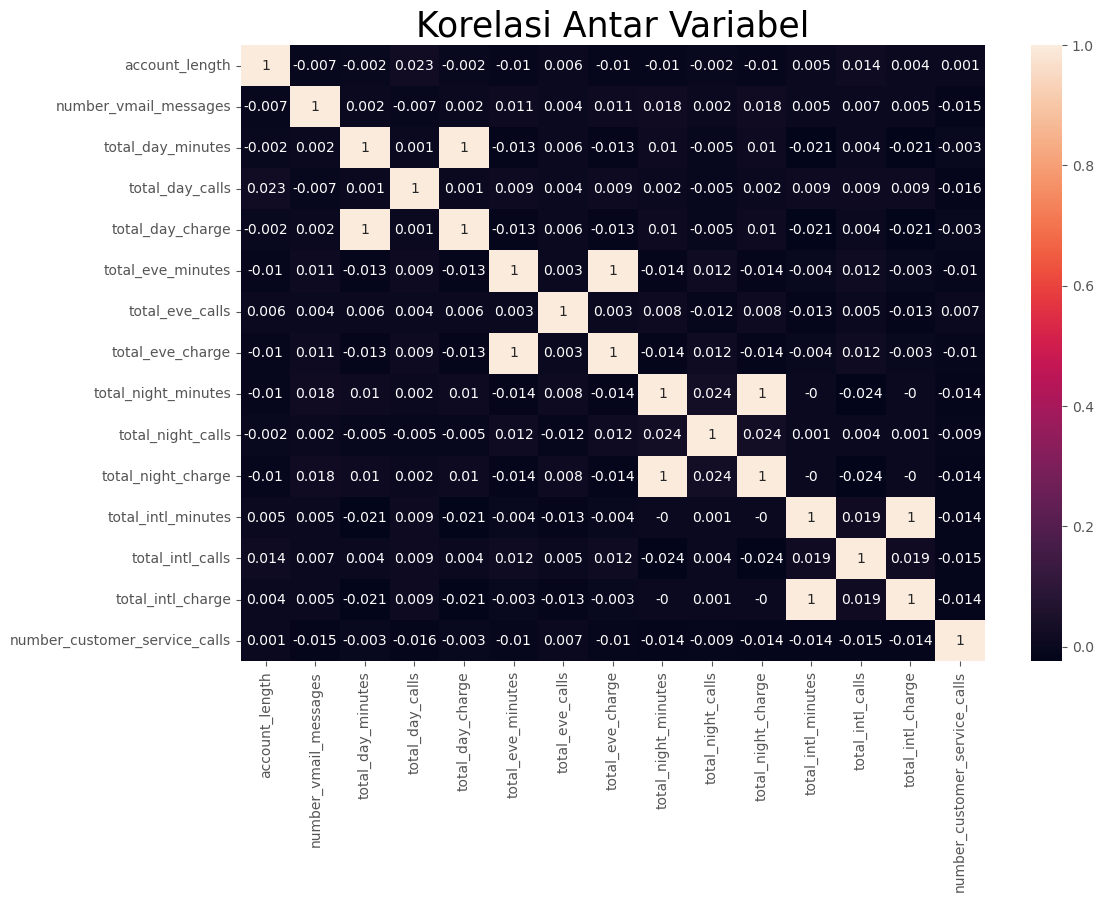

In [10]:
plt.figure(figsize=(12,8))
corr = round(train.corr(),3)
sns.heatmap(corr, annot=True)
plt.title('Korelasi Antar Variabel',size = 25)
plt.savefig('korelasi.png')

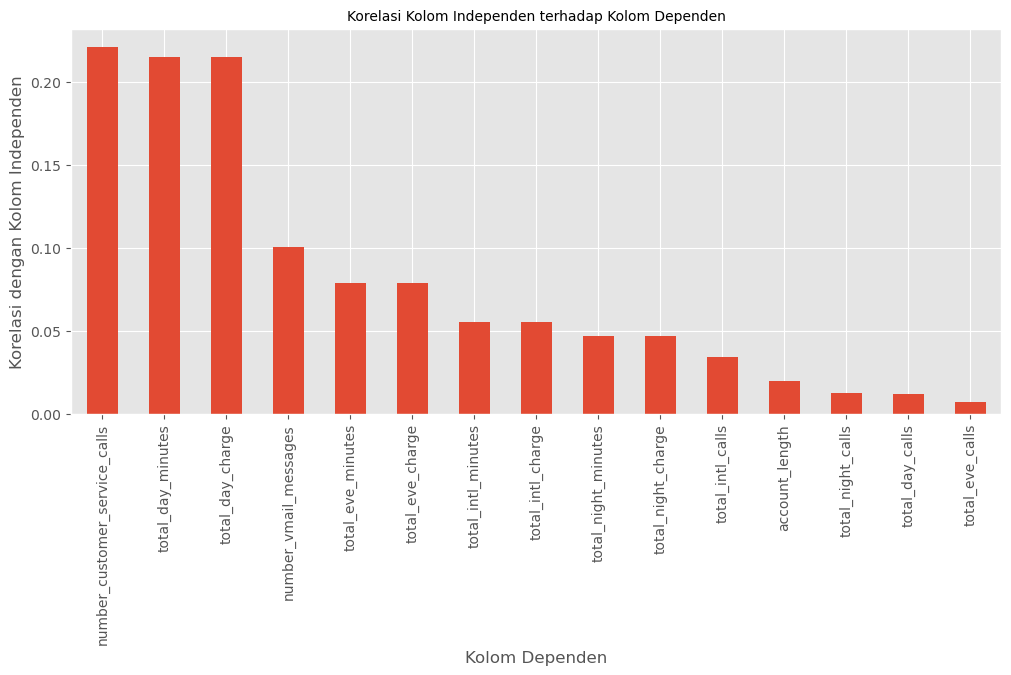

In [11]:
plt.figure(figsize=(12,5))
plt.title('Korelasi Kolom Independen terhadap Kolom Dependen', size = 'medium')
plt.xlabel('Kolom Dependen')
plt.ylabel('Korelasi dengan Kolom Independen')
train['churn'].replace(to_replace='yes', value=1, inplace=True)
train['churn'].replace(to_replace='no',  value=0, inplace=True)
churn_corr = abs(train.corr()['churn'])
churn_corr = churn_corr.drop('churn')
churn_corr.sort_values(ascending = False).plot(kind='bar')
plt.savefig('korelasi dengan churn.png')

<Figure size 640x480 with 0 Axes>

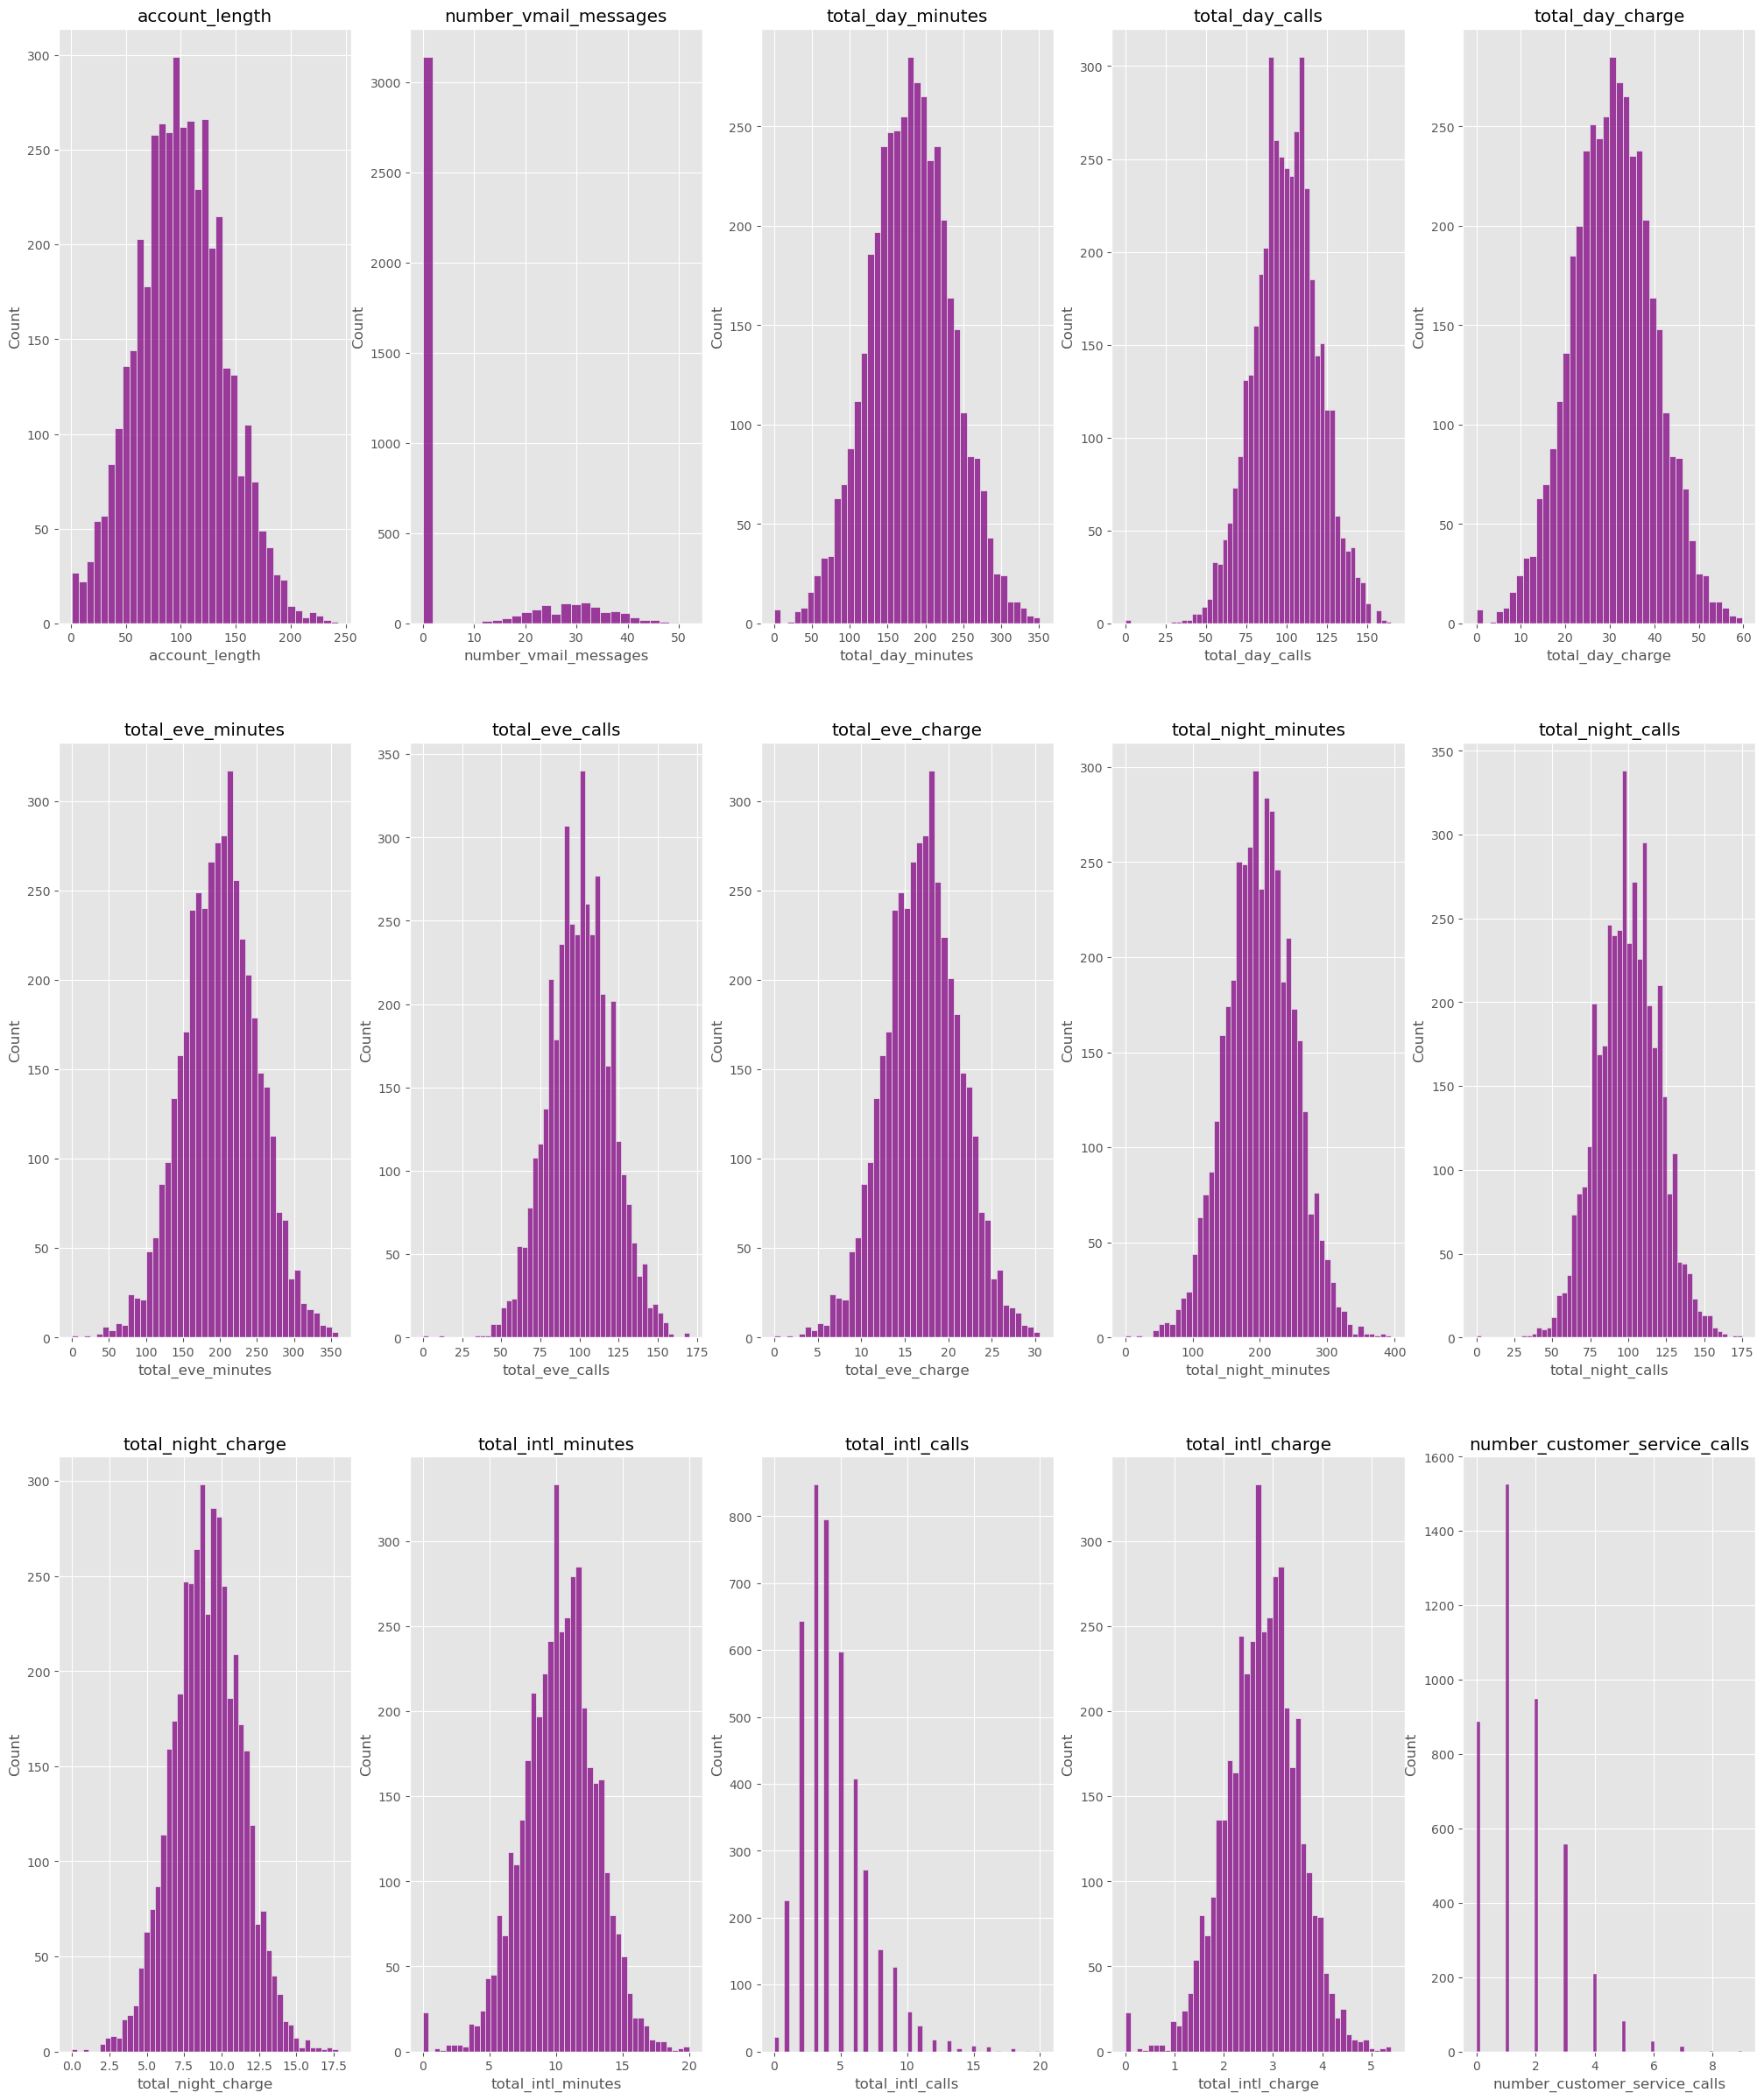

In [12]:
x = 3
y = 5

plt.figure()
fig, ax = plt.subplots(x, y, figsize=(25, 30))
col = 0
column = train.select_dtypes(exclude='object').columns
for i in range(x):
    for j in range(y):
        sns.histplot(train[column[col]], color='purple', ax=ax[i][j])
        ax[i][j].set_title(*[column[col]])
        col+=1
fig.savefig('distribusi data.png')

##### Number Customer Service Call

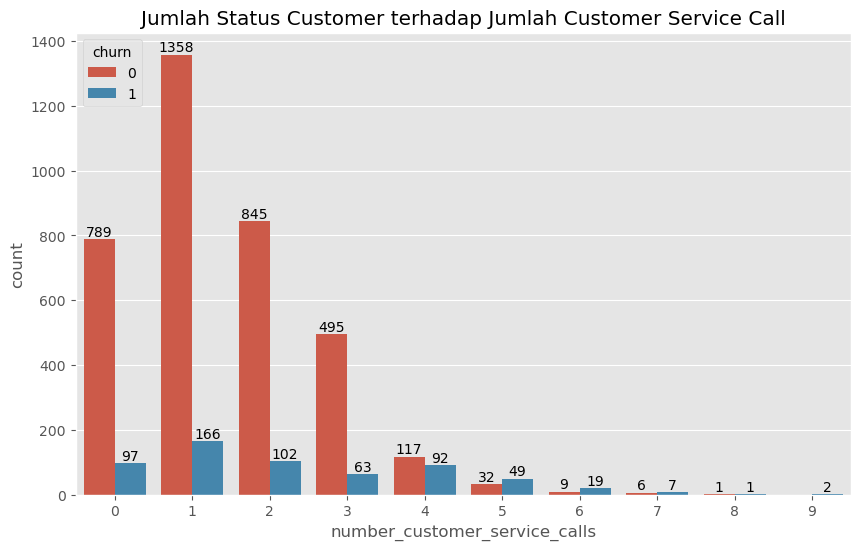

In [13]:
plt.figure(figsize=(10,6))
plt.title('Jumlah Status Customer terhadap Jumlah Customer Service Call')
ax = sns.countplot(x='number_customer_service_calls', hue='churn', data=train)
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('number cs call')

##### Total Day Charge

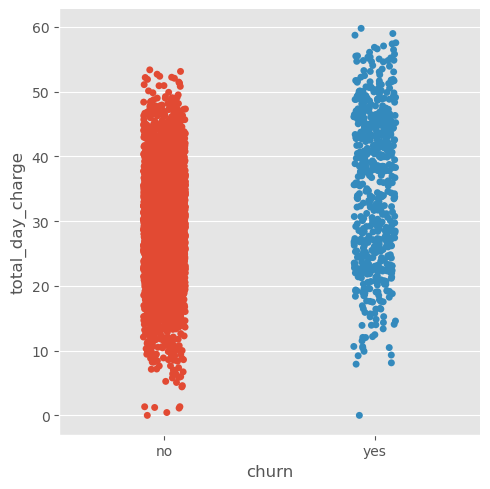

In [14]:
train['churn'].replace(to_replace=1, value='yes', inplace=True)
train['churn'].replace(to_replace=0,  value='no', inplace=True)
sns.catplot(data=train, x="churn", y="total_day_charge")
plt.savefig('total day charge')

##### Number Vmail Messages

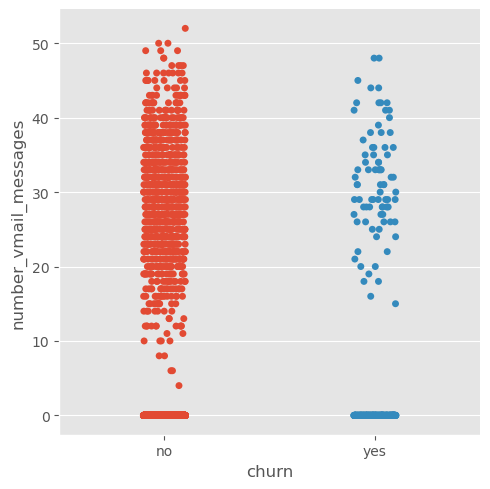

In [15]:
sns.catplot(data=train,x='churn',y='number_vmail_messages')
plt.savefig('vmail messages')

#### EDA untuk Data Kategorikal

1. Melihat jumlah nilai unik dari masing-masing kolom
2. Melihat nilai unik untuk memastikan konsistensi data
3. Melihat Perbandingan Jumlah Churn dan No Churn
4. Melihat secara detail untuk pengaruh masing-masing kolom terhadap data label

In [16]:
print('Jumlah nilai unik pada kolom state : ',train['state'].nunique())
print('Jumlah nilai unik pada kolom area code : ',train['area_code'].nunique())
print('Jumlah nilai unik pada kolom international plan : ',train['international_plan'].nunique())
print('Jumlah nilai unik pada kolom voice mail plan : ',train['voice_mail_plan'].nunique())

Jumlah nilai unik pada kolom state :  51
Jumlah nilai unik pada kolom area code :  3
Jumlah nilai unik pada kolom international plan :  2
Jumlah nilai unik pada kolom voice mail plan :  2


In [17]:
# Cek data unik di kolom kategorikal
for col in categorical:
    print("="*100)
    print('{} : {}'.format(col,train[col].unique()))

state : ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
area_code : ['area_code_415' 'area_code_408' 'area_code_510']
international_plan : ['no' 'yes']
voice_mail_plan : ['yes' 'no']
churn : ['no' 'yes']


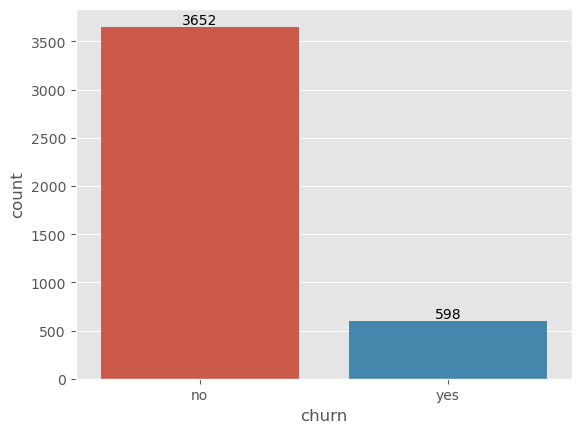

In [18]:
ax = sns.countplot(data=train,x='churn')
ax.bar_label(ax.containers[0])
plt.savefig('churn comparison')

##### Area Code

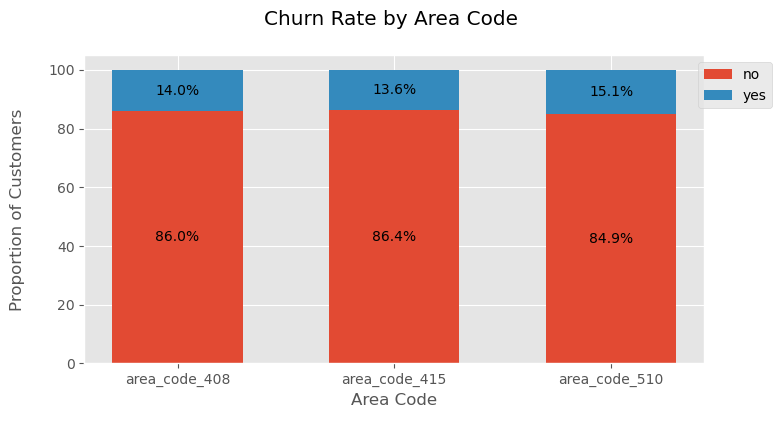

In [19]:
import matplotlib.ticker as mtick
area_churn =train.groupby(['area_code','churn']).size().unstack()
ax = (area_churn.T*100.0 / area_churn.T.sum()).T.plot(kind='bar',width = 0.6,stacked = True,rot = 0,figsize = (8,4))
plt.ylabel('Proportion of Customers\n')
plt.xlabel('Area Code\n')
plt.title('Churn Rate by Area Code \n')
plt.legend(loc='upper center',bbox_to_anchor=(1.05,1) ,fontsize = "medium")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')
ax.autoscale(enable=True, axis='both', tight=False)
plt.savefig('areacode')

##### International Plan

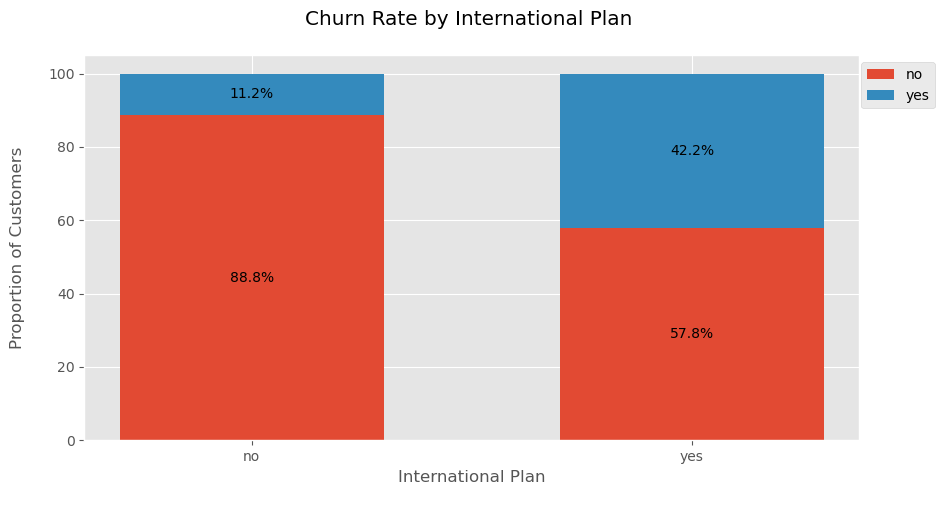

In [20]:
import matplotlib.ticker as mtick
intl_plan_churn =train.groupby(['international_plan','churn']).size().unstack()
ax = (intl_plan_churn.T*100.0 / intl_plan_churn.T.sum()).T.plot(kind='bar',width = 0.6,stacked = True,rot = 0,figsize = (10,5))
plt.ylabel('Proportion of Customers\n')
plt.xlabel('International Plan\n')
plt.title('Churn Rate by International Plan \n')
plt.legend(loc='upper center',bbox_to_anchor=(1.05,1) ,fontsize = "medium")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')
ax.autoscale(enable=True, axis='both', tight=False)
plt.savefig('itl plan')

##### Voicemail

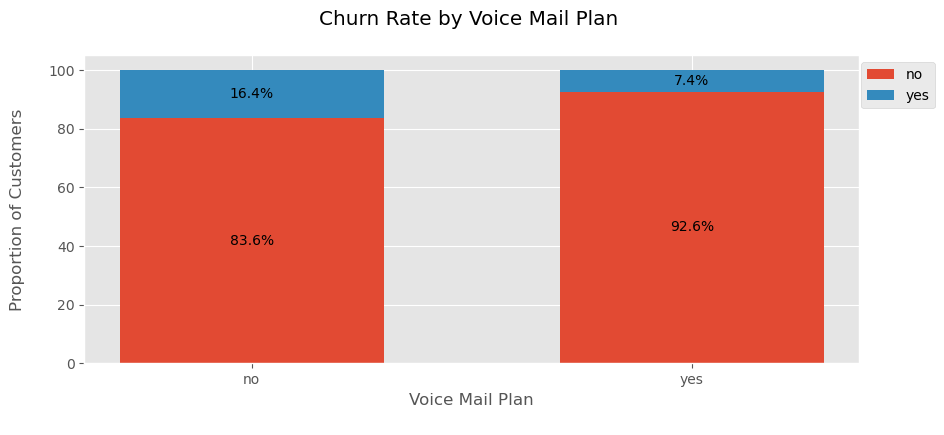

In [21]:
import matplotlib.ticker as mtick
voicemail_churn =train.groupby(['voice_mail_plan','churn']).size().unstack()
ax = (voicemail_churn.T*100.0 / voicemail_churn.T.sum()).T.plot(kind='bar',width = 0.6,stacked = True,rot = 0,figsize = (10,4))
plt.ylabel('Proportion of Customers\n')
plt.xlabel('Voice Mail Plan\n')
plt.title('Churn Rate by Voice Mail Plan \n')
plt.legend(loc='upper center',bbox_to_anchor=(1.05,1) ,fontsize = "medium")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')
ax.autoscale(enable=True, axis='both', tight=False)
plt.savefig('vmail')

#### Note Berdasarkan Proses EDA

##### General :
1. Data terdiri dari 20 kolom (15 numerik dan 5 kategorikal)
2. Seluruh baris bersifat unik atau tidak memiliki data duplikat
3. Data train tidak memiliki missing value

##### Data Numerik :
1. Terdapat korelasi positif sempurna antar kolom dependen yaitu :
* total_day_minutes dan total_day_charge
* total_eve_minutes dan total_eve_charge
* total_night_minutes dan total_night_charge
* total_intl_minutes dan total_intl_charge

Hal tersebut dikarenakan biaya komunikasi per menit sudah ditentukan sehingga akan menyebabkan dua variabel minutes dan charge korelasi positif sempurna

2. Kolom numerik yang memiliki korelasi tertinggi dengan data independen yaitu :
* number_customer_service_calls
* total_day_minutes = total_day_charge
* number_vmail_messages

3. Distribusi data sebagian besar merupakan distribusi normal, beberapa data yang memiliki distribusi tidak normal yaitu :
* number_vmail_messages
* total_intl_calls
* number_customer_service_calls
4. Terdapat outliers di kolom total_day_charge

##### Data Kategorikal :
1. Data kategorikal bersifat konsisten
2. Data target bersifat inbalance
3. Kolom international plan menjelaskan bahwa customer yang memiliki international plan memiliki churn rate yang tinggi

<p><div class="text-center">
    
### DATA PREPROCESSING

<p><div class="text-justify">
    
##### Beberapa hal yang akan dilakukan dalam data preprocesing adalah :
1. Menghapus kolom total_day_minutes, total_eve_minutes, total_night_minutes, total_intl_minutes. Hal tersebut karena variabel tersebut memiliki korelasi positif sempurna dengan kolom charge. Hal tersebut merupakan multicolinearity yang dapat mengganggu hasil machine learning. Selain itu, jika dilihat dalam dunia nyata, harusnya total menit untuk menelepon tidak akan mempengaruhi seseorang untuk beralih. Hal yang membuat customer beralih adalah biaya untuk melakukan panggilan.
2. Menerapkan RobustScaler pada kolom total_day_charge karena memiliki outliers
3. Menerapkan StandarScaler pada kolom number_vmail_messages, total_intl_calls, dan number_customer_service_calls karena distribusi kolom tersebut bukan merupakan distribusi normal.
4. Menerapkan MinmaxScaler pada kolom numerik lainnya.
5. Melakukan Fitur Encoding

In [22]:
train = train.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1)

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [24]:
train['account_length'] = MinMaxScaler().fit_transform(train['account_length'].values.reshape(len(train), 1))
train['total_eve_calls'] = MinMaxScaler().fit_transform(train['total_eve_calls'].values.reshape(len(train), 1))
train['total_eve_charge'] = MinMaxScaler().fit_transform(train['total_eve_charge'].values.reshape(len(train), 1))
train['total_night_calls'] = MinMaxScaler().fit_transform(train['total_night_calls'].values.reshape(len(train), 1))
train['total_night_charge'] = MinMaxScaler().fit_transform(train['total_night_charge'].values.reshape(len(train), 1))
train['total_intl_calls'] = MinMaxScaler().fit_transform(train['total_intl_calls'].values.reshape(len(train), 1))
train['total_intl_charge'] = MinMaxScaler().fit_transform(train['total_intl_charge'].values.reshape(len(train), 1))


train['number_vmail_messages'] = StandardScaler().fit_transform(train['number_vmail_messages'].values.reshape(len(train), 1))
train['total_intl_calls'] = StandardScaler().fit_transform(train['total_intl_calls'].values.reshape(len(train), 1))
train['number_customer_service_calls'] = StandardScaler().fit_transform(train['number_customer_service_calls'].values.reshape(len(train), 1))


train['total_day_charge'] = RobustScaler().fit_transform(train['total_day_charge'].values.reshape(len(train), 1))

In [25]:
train['churn'].replace(to_replace='yes', value=1, inplace=True)
train['churn'].replace(to_replace='no',  value=0, inplace=True)
for cat in ['state', 'area_code', 'international_plan', 'voice_mail_plan']:
    onehots = pd.get_dummies(train[cat], prefix=cat)
    train = train.join(onehots)
train = train.drop(['state', 'area_code', 'international_plan', 'voice_mail_plan'],axis=1)

In [26]:
train.head()

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.438017,1.366857,123,-0.259184,0.605882,0.544204,0.588571,0.644344,-0.579164,0.685185,-0.426346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,0.561983,-0.567911,114,0.863948,0.647059,0.337263,0.594286,0.411930,0.232927,0.609259,-1.188960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,0.342975,-0.567911,71,1.632620,0.517647,0.172233,0.508571,0.498593,1.045017,0.329630,0.336268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
3,0.305785,-0.567911,113,-0.188938,0.717647,0.412901,0.691429,0.473270,-0.579164,0.505556,1.098882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,0.495868,1.218029,88,0.517562,0.635294,0.969876,0.674286,0.538548,1.045017,0.375926,1.098882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1


<p><div class="text-center">

### MACHINE LEARNING

##### Model atau Algoritma yang akan digunakan antara lain :
1. KNN
2. Decision Tree
3. Random Forest
4. Gaussian Naive Bayes
5. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import SMOTE

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [28]:
X = train.drop("churn",axis = 1 )
Y = train['churn']

### KFold Validation

##### Logistic Regression

In [29]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy = []
recall = []
f1 = []
precision = []
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = Y.iloc[test_index]
    sm = SMOTE(random_state=42)
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model = LogisticRegression()
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    rec = recall_score(y_test, y_pred)
    recall.append(rec)
    prec = precision_score(y_test,y_pred)
    precision.append(prec)
    f_one = f1_score(y_test,y_pred)
    f1.append(f_one)
Data_logreg = pd.DataFrame({'Accuracy LogReg' : accuracy,'Recall LogReg':recall, 'Precision logreg': precision,'F1 Score logreg': f1 })

C:\Users\lenov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

##### KNN

In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy = []
recall = []
f1 = []
precision = []
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = Y.iloc[test_index]
    sm = SMOTE(random_state=42)
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model = KNeighborsClassifier()
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    rec = recall_score(y_test, y_pred)
    recall.append(rec)
    prec = precision_score(y_test,y_pred)
    precision.append(prec)
    f_one = f1_score(y_test,y_pred)
    f1.append(f_one)
Data_knn = pd.DataFrame({'Accuracy KNN' : accuracy,'Recall KNN':recall , 'Precision KNN': precision,'F1 Score KNN': f1})

##### Decision Tree

In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy = []
recall = []
f1 = []
precision = []
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = Y.iloc[test_index]
    sm = SMOTE(random_state=42)
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model = DecisionTreeClassifier()
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    rec = recall_score(y_test, y_pred)
    recall.append(rec)
    prec = precision_score(y_test,y_pred)
    precision.append(prec)
    f_one = f1_score(y_test,y_pred)
    f1.append(f_one)
Data_DT = pd.DataFrame({'Accuracy DT' : accuracy,'Recall DT':recall, 'Precision DT': precision,'F1 Score DT': f1 })

##### Random Forest

In [32]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy = []
recall = []
f1 = []
precision = []
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = Y.iloc[test_index]
    sm = SMOTE(random_state=42)
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model = RandomForestClassifier()
    model.fit(X_train_oversampled, y_train_oversampled )  
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    rec = recall_score(y_test, y_pred)
    recall.append(rec)
    prec = precision_score(y_test,y_pred)
    precision.append(prec)
    f_one = f1_score(y_test,y_pred)
    f1.append(f_one)
Data_rf = pd.DataFrame({'Accuracy RandomForest' : accuracy,'Recall RandomForest':recall, 'Precision RandomForest': precision,'F1 Score RandomForest': f1 })

In [33]:
Data = [Data_logreg,Data_knn, Data_DT, Data_rf]
for i in Data:
    print(i.mean())
    print('==================================')

Accuracy LogReg     0.856941
Recall LogReg       0.406480
Precision logreg    0.488739
F1 Score logreg     0.443395
dtype: float64
Accuracy KNN     0.656000
Recall KNN       0.700915
Precision KNN    0.245662
F1 Score KNN     0.363352
dtype: float64
Accuracy DT     0.891294
Recall DT       0.788481
Precision DT    0.585462
F1 Score DT     0.671488
dtype: float64
Accuracy RandomForest     0.929412
Recall RandomForest       0.728982
Precision RandomForest    0.757096
F1 Score RandomForest     0.741522
dtype: float64


### Train Test Split

##### Logistic Regression

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train_oversampled, y_train_oversampled )  
y_pred = model.predict(X_test)
print('Akurasi Logistic Regression : ' ,accuracy_score(y_test, y_pred))
print('Recall Logistic Regression : ', recall_score(y_test, y_pred))
print('Precision Logistic Regression : ', precision_score(y_test,y_pred))
print('F1 Score Logistic Regression : ', f1_score(y_test,y_pred))


Akurasi Logistic Regression :  0.8509803921568627
Recall Logistic Regression :  0.4564102564102564
Precision Logistic Regression :  0.5144508670520231
F1 Score Logistic Regression :  0.4836956521739131


C:\Users\lenov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### KNN 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
model = KNeighborsClassifier()
model.fit(X_train_oversampled, y_train_oversampled )  
y_pred = model.predict(X_test)
print('Akurasi KNN : ' ,accuracy_score(y_test, y_pred))
print('Recall KNN : ', recall_score(y_test, y_pred))
print('Precision KNN : ', precision_score(y_test,y_pred))
print('F1 Score KNN : ', f1_score(y_test,y_pred))


Akurasi KNN :  0.6580392156862745
Recall KNN :  0.6461538461538462
Precision KNN :  0.25557809330628806
F1 Score KNN :  0.36627906976744196


##### Decision Tree

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
model = DecisionTreeClassifier()
model.fit(X_train_oversampled, y_train_oversampled )  
y_pred = model.predict(X_test)
print('Akurasi Decision Tree : ' ,accuracy_score(y_test, y_pred))
print('Recall Decision Tree : ', recall_score(y_test, y_pred))
print('Precision Decision Tree : ', precision_score(y_test,y_pred))
print('F1 Score Decision Tree : ', f1_score(y_test,y_pred))


Akurasi Decision Tree :  0.8447058823529412
Recall Decision Tree :  0.7282051282051282
Precision Decision Tree :  0.49477351916376305
F1 Score Decision Tree :  0.5892116182572613


##### Random Forest

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
model = RandomForestClassifier()
model.fit(X_train_oversampled, y_train_oversampled )  
y_pred = model.predict(X_test)
print('Akurasi RandomForestClassifier : ' ,accuracy_score(y_test, y_pred))
print('Recall RandomForestClassifier : ', recall_score(y_test, y_pred))
print('Precision RandomForestClassifier : ', precision_score(y_test,y_pred))
print('F1 Score RandomForestClassifier : ', f1_score(y_test,y_pred))


Akurasi RandomForestClassifier :  0.9176470588235294
Recall RandomForestClassifier :  0.7384615384615385
Precision RandomForestClassifier :  0.7272727272727273
F1 Score RandomForestClassifier :  0.732824427480916


#### Prediksi menggunakan RandomForestClassification

In [38]:
test = pd.read_csv('test.csv')
test = test.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1)
test['account_length'] = MinMaxScaler().fit_transform(test['account_length'].values.reshape(len(test), 1))
test['total_eve_calls'] = MinMaxScaler().fit_transform(test['total_eve_calls'].values.reshape(len(test), 1))
test['total_eve_charge'] = MinMaxScaler().fit_transform(test['total_eve_charge'].values.reshape(len(test), 1))
test['total_night_calls'] = MinMaxScaler().fit_transform(test['total_night_calls'].values.reshape(len(test), 1))
test['total_night_charge'] = MinMaxScaler().fit_transform(test['total_night_charge'].values.reshape(len(test), 1))
test['total_intl_calls'] = MinMaxScaler().fit_transform(test['total_intl_calls'].values.reshape(len(test), 1))
test['total_intl_charge'] = MinMaxScaler().fit_transform(test['total_intl_charge'].values.reshape(len(test), 1))


test['number_vmail_messages'] = StandardScaler().fit_transform(test['number_vmail_messages'].values.reshape(len(test), 1))
test['total_intl_calls'] = StandardScaler().fit_transform(test['total_intl_calls'].values.reshape(len(test), 1))
test['number_customer_service_calls'] = StandardScaler().fit_transform(test['number_customer_service_calls'].values.reshape(len(test), 1))


test['total_day_charge'] = RobustScaler().fit_transform(test['total_day_charge'].values.reshape(len(test), 1))
for cat in ['state', 'area_code', 'international_plan', 'voice_mail_plan']:
    onehots = pd.get_dummies(test[cat], prefix=cat)
    test = test.join(onehots)
test = test.drop(['state', 'area_code', 'international_plan', 'voice_mail_plan','id'],axis=1)

In [39]:
test.head()

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.535865,1.172240,110,1.253181,0.488189,0.500000,0.506410,0.618440,-0.613702,0.529412,-0.497639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,0.493671,-0.599015,98,0.651824,0.503937,0.569710,0.679487,0.488652,0.625821,0.333333,-1.281734,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,0.257384,-0.599015,70,-0.829092,0.307087,0.830149,0.557692,0.485816,0.625821,0.694118,1.854646,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,0.388186,-0.599015,114,0.180237,0.582677,0.562633,0.698718,0.251064,-0.613702,0.429412,1.070551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0
4,0.729958,-0.599015,76,-0.777354,0.590551,0.739561,0.660256,0.637589,0.212647,0.821569,1.070551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [40]:
print(test.shape)
print(X.shape)

(750, 69)
(4250, 69)


In [41]:
rf = RandomForestClassifier()
rf.fit(X,Y)
prediction = rf.predict(test)

In [42]:
test_data = pd.read_csv('test.csv')
test_data['churn'] = prediction
test_data.head(3)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0


In [43]:
output = pd.DataFrame({'CustomerId': test.index,
                       'churn': prediction})
output.to_csv('submission.csv', index=False)
submission_data = pd.read_csv("submission.csv")
submission_data.head()

,CustomerId,churn
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
